In [1]:
#Importing all the neccessary libraries
library(readr)
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(tidyverse)
library(DT)
library(scales)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ purrr   1.0.2     ✔ tibble  3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [2]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0") # nolint
colors

[1] "#CC1011" "#665555" "#05a399" "#cfcaca" "#f5e840" "#0683c9" "#e075b0"

In [3]:
#Read data from each months
apr <- read_csv("uber-raw-data-apr14.csv")
may <- read_csv("uber-raw-data-may14.csv")
jun <- read_csv("uber-raw-data-jun14.csv")
jul <- read_csv("uber-raw-data-jul14.csv")
aug <- read_csv("uber-raw-data-aug14.csv")
sep <- read_csv("uber-raw-data-sep14.csv")

Rows: 564516 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date/Time, Base
dbl (2): Lat, Lon

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 652435 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date/Time, Base
dbl (2): Lat, Lon

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 663844 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date/Time, Base
dbl (2): Lat, Lon

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 796121 Columns: 4
── Column specificatio

In [4]:
#combining the data
data <- rbind(apr, may, jun, jul, aug, sep)

In [5]:
head(data)

Date/Time,Lat,Lon,Base
<chr>,<dbl>,<dbl>,<chr>
4/1/2014 0:11:00,40.7690,-73.9549,B02512
4/1/2014 0:17:00,40.7267,-74.0345,B02512
4/1/2014 0:21:00,40.7316,-73.9873,B02512
4/1/2014 0:28:00,40.7588,-73.9776,B02512
4/1/2014 0:33:00,40.7594,-73.9722,B02512
4/1/2014 0:33:00,40.7383,-74.0403,B02512


In [6]:
#Formatting the data
data[["Date/Time"]] <- as.POSIXct(data[["Date/Time"]], format = "%m/%d/%Y %H:%M:%S") # nolint
data$Time <- format(as.POSIXct(data[["Date/Time"]], format = "%m/%d/%Y %H:%M:%S"), format = "%H:%M%:%S") # nolint
data[["Date/Time"]] <- ymd_hms(data[["Date/Time"]])

Warning message:
" 2211 failed to parse."


In [7]:
#creating individual columns for month, day and year
data$day <- factor(day(data[["Date/Time"]]))
data$month <- factor(month(data[["Date/Time"]], label = TRUE))
data$year <- factor(year(data[["Date/Time"]]))
data$day_of_week <- factor(wday(data[["Date/Time"]], label = TRUE))

In [8]:
data$second <- factor(second(hms(data$Time)))
data$minute <- factor(minute(hms(data$Time)))
data$hour <- factor(hour(hms(data$Time)))

In [9]:
head(data)

Date/Time,Lat,Lon,Base,Time,day,month,year,day_of_week,second,minute,hour
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue,0,11,0
2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue,0,17,0
2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue,0,21,0
2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue,0,28,0
2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue,0,33,0
2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue,0,33,0


In [10]:
hourly_data <- data %>% group_by(hour) %>% dplyr::summarize(Total = n())
datatable(hourly_data)

HTML widgets cannot be represented in plain text (need html)

In [11]:
max(hourly_data$Total)

[1] 336190

In [12]:
range <- function(min, max, interval)
{
    seq(min, max, interval) # nolint
}

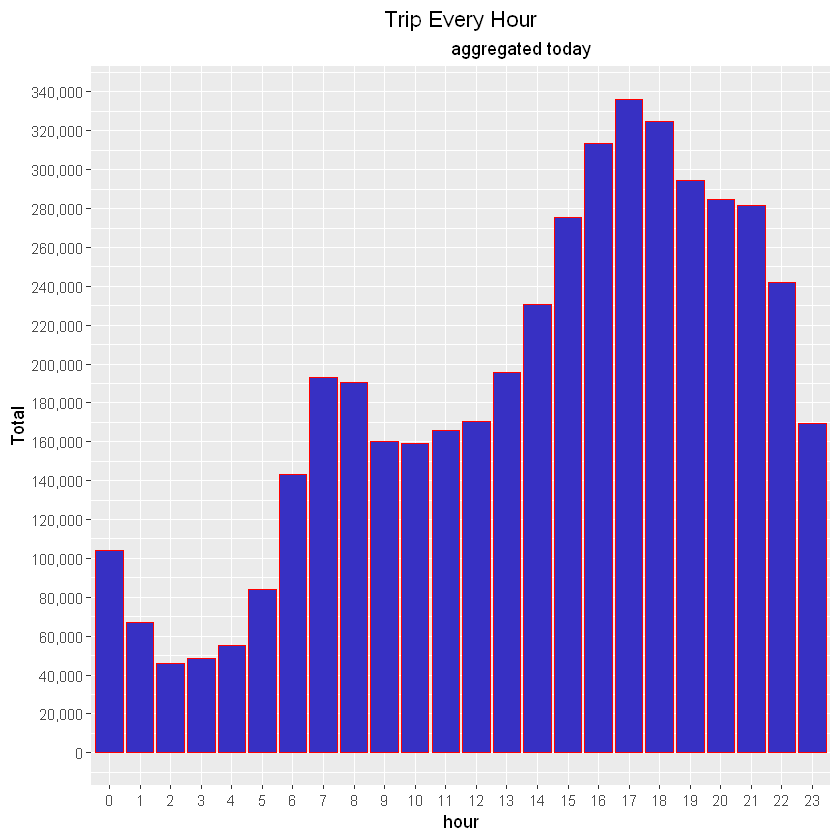

In [18]:
ggplot(hourly_data, aes(hour, Total)) +   # nolint
geom_bar(stat = "identity", # nolint
            fill = "#3730c3", # nolint
            color = "#ff0000") +
ggtitle("Trip Every Hour", subtitle = "aggregated today") +  # nolint
theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5), # nolint
        plot.subtitle = element_text(hjust = 0.6)) +  # nolint
    scale_y_continuous(labels = comma, breaks = range(0, 400000, 20000))# nolint

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


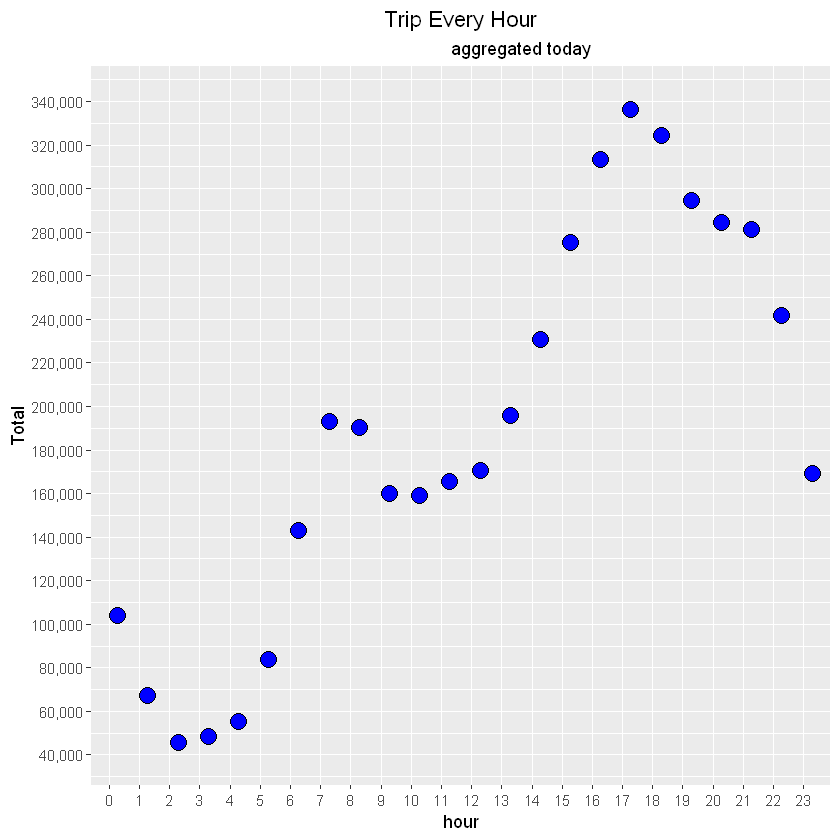

In [19]:
ggplot(hourly_data, aes(hour, Total)) +   # nolint
geom_dotplot(binaxis = "y", 
            dotsize = 0.8,
            fill = "blue") + 
ggtitle("Trip Every Hour", subtitle = "aggregated today") +  # nolint
theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5), # nolint
        plot.subtitle = element_text(hjust = 0.6)) +  # nolint
scale_y_continuous(labels = comma, breaks = range(0, 400000, 20000))# nolint

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


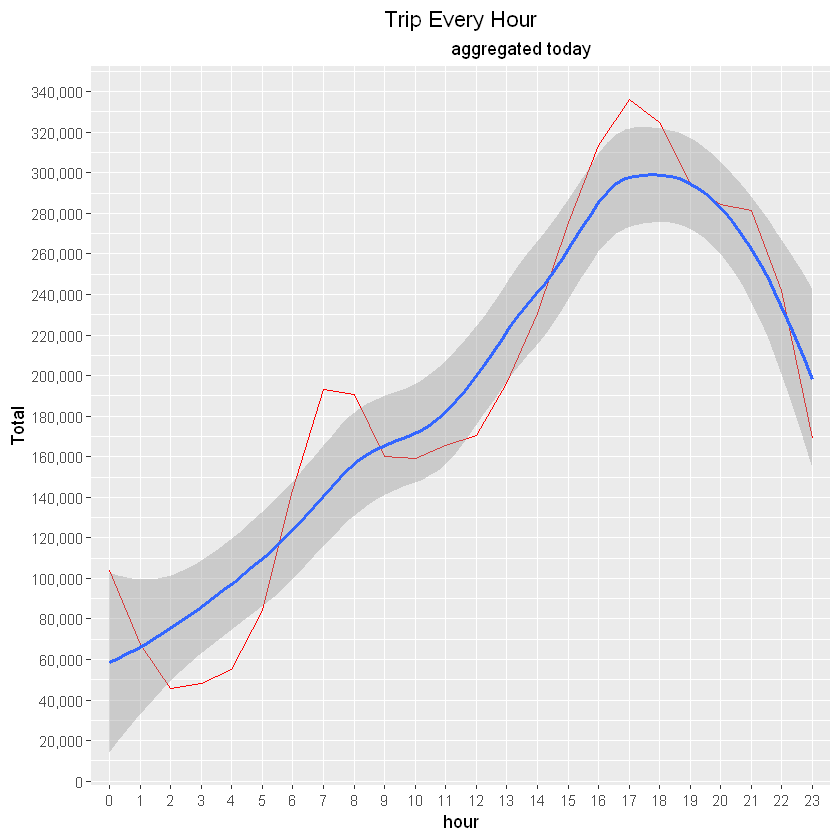

In [21]:
ggplot(hourly_data, aes(x = hour, y = Total, group = 1)) +   # nolint
geom_line(color = "red")+
geom_smooth()+
ggtitle("Trip Every Hour", subtitle = "aggregated today") +  # nolint
theme(legend.position = "none",
        plot.title = element_text(hjust = 0.5), # nolint
        plot.subtitle = element_text(hjust = 0.6)) +  # nolint
scale_y_continuous(labels = comma, breaks = range(0, 400000, 20000))# nolint  


In [16]:
floor(mean(hourly_data$Total))
median(sort(hourly_data$Total))
getmode <- function(v) {
    uniqv <- unique(v)
    uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(hourly_data$Total)

[1] 188930

[1] 180478

[1] 103836

In [17]:
library(moments)
skewness(hourly_data$Total)

[1] -0.02959967

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


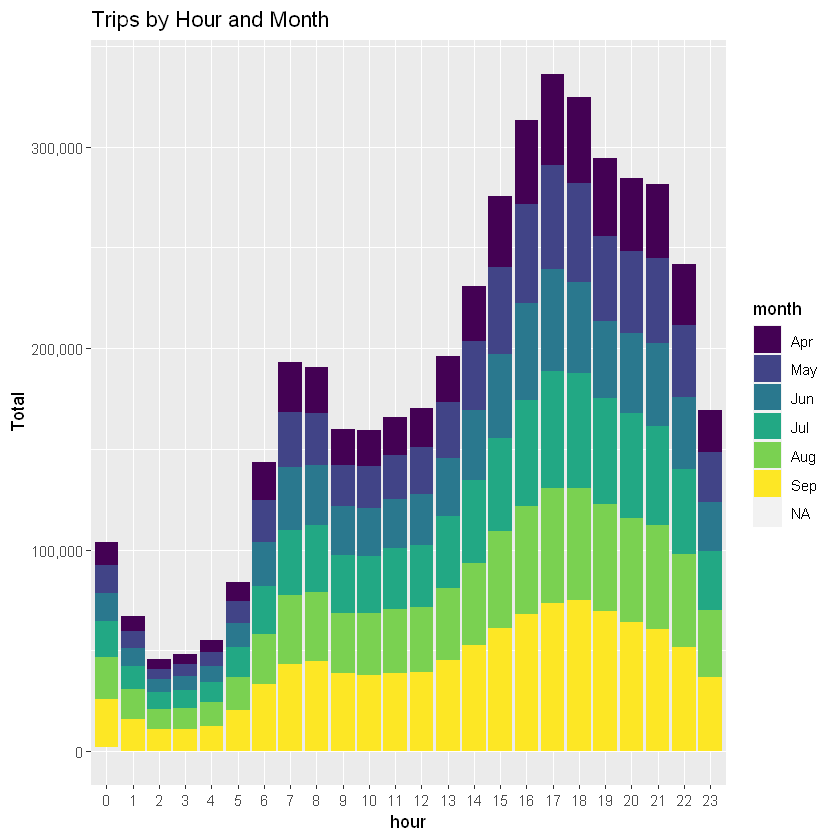

In [22]:
#Aggregating the data by month and hour
month_hour_data <- data %>% group_by(month, hour) %>%  dplyr::summarize(Total = n()) # nolint
ggplot(month_hour_data, aes(hour, Total, fill=month)) + 
geom_bar(stat = "identity") + 
ggtitle("Trips by Hour and Month") + 
scale_y_continuous(labels = comma)


In [23]:
#Plotting data by trips during every day of the month
#Aggregating the data by day of the month

day_data <- data %>% group_by(day) %>% dplyr::summarize(Trips = n())
day_data

day,Trips
<fct>,<int>
1,127360
2,143146
3,142914
4,140869
5,146970
6,139800
7,143422
8,145932
9,155077


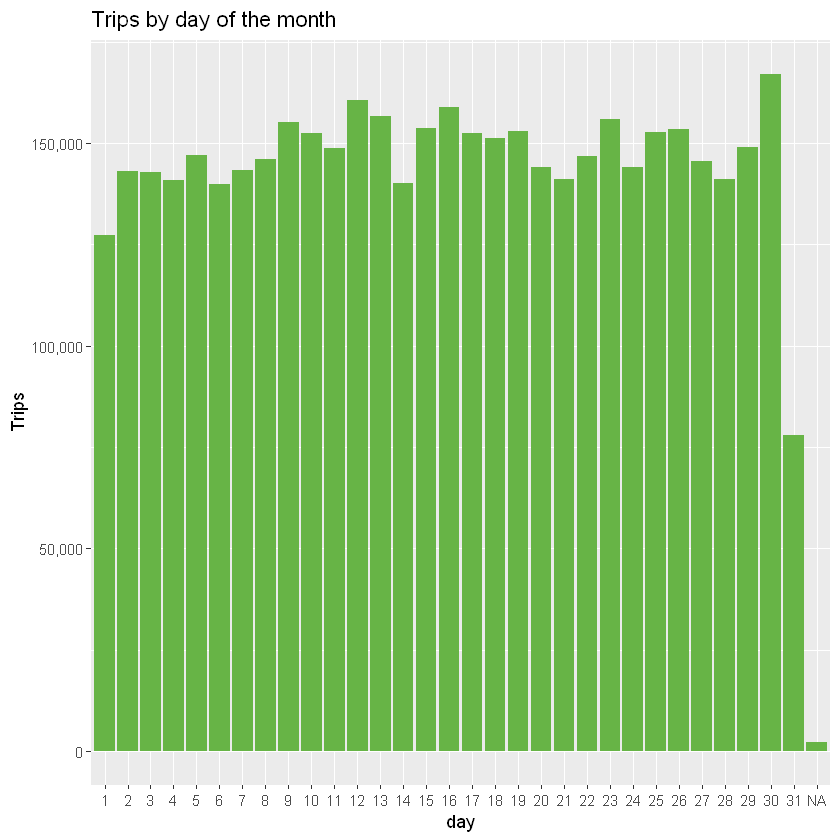

In [30]:
#plotting the data
ggplot(day_data, aes(day, Trips)) + 
geom_bar(stat = "identity", fill = "#67b446") +
ggtitle("Trips by day of the month") + 
theme(legend.position = "none") + 
scale_y_continuous(labels = comma)

In [26]:
#collecting the data by day of the week of the month
day_month_data <- data %>% group_by(day_of_week, month) %>% dplyr::summarize(Trips = n()) # nolint
day_month_data

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


day_of_week,month,Trips
<ord>,<ord>,<int>
Sun,Apr,51162
Sun,May,56084
Sun,Jun,79560
Sun,Jul,76251
Sun,Aug,110131
Sun,Sep,116390
Mon,Apr,60848
Mon,May,63826
Mon,Jun,94640


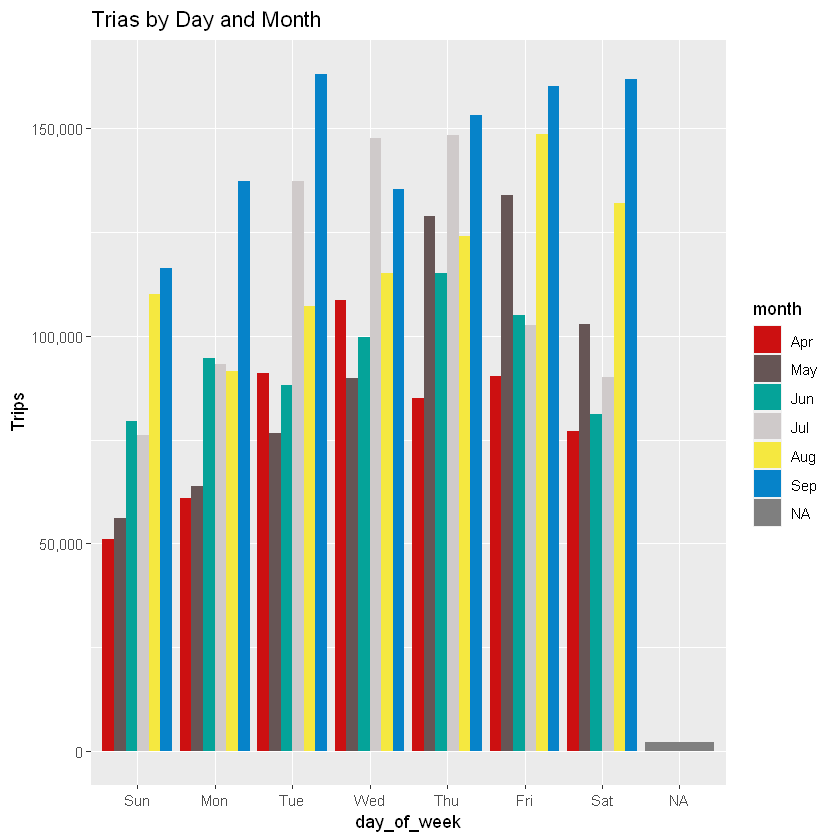

In [27]:
#plotting the data
ggplot(day_month_data, aes(day_of_week, Trips, fill = month)) + 
geom_bar(stat = "identity", aes(fill = month), position = "dodge") + 
ggtitle("Trias by Day and Month") + 
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = colors)

In [28]:
#collecting the data by month of the year
month_data <- data %>% group_by(month) %>% dplyr::summarize(Total = n())

month_data

month,Total
<ord>,<int>
Apr,564264
May,652124
Jun,663545
Jul,795732
Aug,828805
Sep,1027646
NA,2211


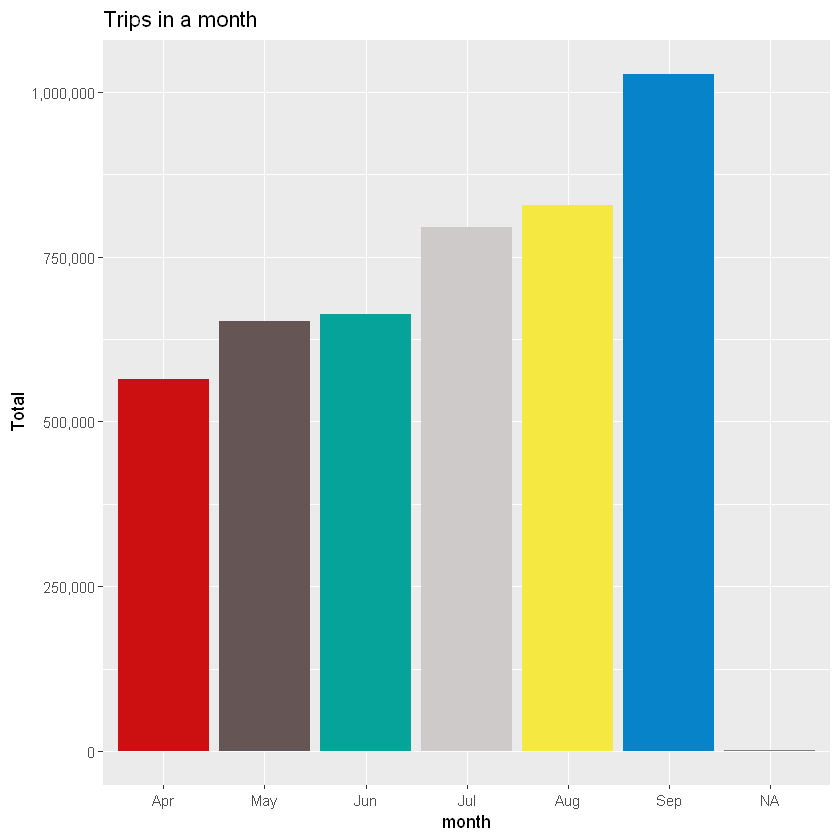

In [29]:
#Plotting the data
ggplot(month_data, aes(month, Total, fill = month)) + 
geom_bar(stat = "Identity") + 
ggtitle("Trips in a month") + 
theme(legend.position = "none") + 
scale_y_continuous(labels = comma) + 
scale_fill_manual(values = colors)